In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lifelines

c:\Users\sarah\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#Load training data
train=pd.read_csv('training_data.csv')
train

<ipython-input-2-970d2249f0db>:1: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('training_data.csv')


,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry
0,1.0,P,0,0,I 0-6,1.0,581-600,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201807,B
1,0.0,P,0,0,I 0-6,1.0,721-740,NaN,159,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201906,C
2,1.0,T,0,0,I 7-12,1.0,761+,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201905,A
3,1.0,T,0,1,I 0-6,1.0,761+,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201806,B
4,1.0,P,0,0,A,0.0,721-740,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201902,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758218,0.0,T,1,0,A,1.0,641-660,NaN,41,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,A
5758219,1.0,I,1,0,A,1.0,701-720,NaN,47,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,C
5758220,1.0,R,1,0,I 0-6,1.0,741-760,NaN,34,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,B
5758221,0.0,T,1,0,Recovery,1.0,681-700,NaN,50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,B


In [16]:
#Choose subset of training data to experiment with
train_subset=train.sample(n=10000)

In [21]:
#Keep only relevant columns
train_subset=train_subset[['mob','charge_off']]

In [22]:
#Check to make sure some charge offs are included
train_subset['charge_off'].value_counts()

0    9974
1      26
Name: charge_off, dtype: int64

In [23]:
train_subset

,mob,charge_off
4070674,278,0
860549,11,0
2712775,29,0
3935100,49,0
763131,88,0
...,...,...
5433069,6,0
3362378,5,0
1828165,11,0
5705525,101,0


In [20]:
train_subset.dtypes

mob           int64
snapshot      int64
charge_off    int64
dtype: object

In [26]:
#Survival table using whole training set
from lifelines.utils import survival_table_from_events

table=survival_table_from_events(train['mob'],train['charge_off'])
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5758223,5758223
2.0,116011,273,115738,0,5758223
3.0,117601,315,117286,0,5642212
4.0,114426,355,114071,0,5524611
5.0,112945,352,112593,0,5410185
...,...,...,...,...,...
830.0,11,0,11,0,51
832.0,18,0,18,0,40
835.0,6,0,6,0,22


# Kaplan-Meier

In [29]:
from lifelines import KaplanMeierFitter
kmf=KaplanMeierFitter()
kmf.fit(train['mob'],event_observed=train['charge_off'])
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
2.0,0.999953
3.0,0.999897
4.0,0.999833
5.0,0.999767
...,...
830.0,0.989351
832.0,0.989351
835.0,0.989351


<AxesSubplot:xlabel='timeline'>

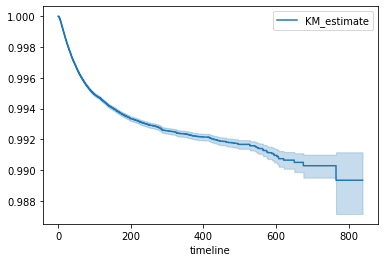

In [30]:
kmf.plot_survival_function()